# Analysis

## 1. Prepare Data

### 1.1 Load Data

In [1012]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1013]:
# Read raw dara
scopus_df = pd.read_csv("../Screening/scopus.csv")
wos_df = pd.read_csv("../Screening/WoS.csv")
ieee_df = pd.read_csv("../Screening/IEEE.csv")
proquest_df = pd.read_csv("../Screening/ProQuest.csv")

In [1014]:
# Read screening data
initial_search_df = pd.read_csv("../Screening/initial_search.csv")
removed_duplicates_df = pd.read_csv("../Screening/removed_duplicates.csv")
after_s1_df = pd.read_csv("../Screening/after_s1.csv")

In [1015]:
# Read analysis data
notion_df = pd.read_csv("notion.csv")
notion_df

,ID,Title,DOI,Link,Instrument,Input enhancement?,Prediction engine?,Post-prediction reasoning?,Survey?,Reviewer,File,Include?,Results,Model(s),Financial Instrument,In Overleaf
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.18653/v1/2023.emnlp-industry.69,Harnessing LLMs for Temporal Data - A Study on...,10.18653/v1/2023.emnlp-industry.69,https://doi.org/10.18653/v1/2023.emnlp-industr...,Stocks,✔️,✔️,✔️,❌,Olav,Litterature%20Database/2023.emnlp-industry.69.pdf,Yes,Yu et al. (2023) investigated stock return pre...,"GPT-4, Open LLaMA 13B",Stock(s),✔️
2,10.1007/s43546-021-00106-0,Construction of a news article evaluation mode...,10.1007/s43546-021-00106-0,https://doi.org/10.1007/s43546-021-00106-0,Stocks,✔️,❌,❌,❌,Sondre,Litterature%20Database/s43546-021-00106-0.pdf,Tja,The study by Nish et al. (2021) developed a de...,GPT-2,Stock(s),NaN
3,10.1007/978-3-030-58790-1_7,News Articles Evaluation Analysis in Automotiv...,10.1007/978-3-030-58790-1_7,https://doi.org/10.1007/978-3-030-58790-1_7,Stocks,✔️,❌,❌,❌,Sondre,Litterature%20Database/978-3-030-58790-1.pdf,Tja,"Nishi, Suge, and Takahashi (2020) develop an L...",GPT-2,Stock(s),NaN
4,10.1109/ICCA62237.2024.10927897,Assessing the Correlation Between News Sentime...,10.1109/icca62237.2024.10927897,https://doi.org/10.1109/icca62237.2024.10927897,Stocks,❌,❌,❌,❌,Sondre,Litterature%20Database/Assessing_the_Correlati...,Yes,Al Nahyan and Shuhaiber (2024) examine the rel...,Open AI,Stock(s),✔️
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,10.1016/j.dss.2024.114362,Revisiting time-varying dynamics in stock mark...,10.1016/j.dss.2024.114362,https://doi.org/10.1016/j.dss.2024.114362,Stock,❌,❌,❌,❌,Sander,Litterature%20Database/1-s2.0-S016792362400195...,Tja,BERT,NaN,NaN,NaN
136,10.54364/AAIML.2025.52216,Assessing Lag-Llama in Probabilistic Time Seri...,10.54364/aaiml.2025.52216,https://doi.org/10.54364/aaiml.2025.52216,Stock,❌,✔️,❌,❌,Sondre,Litterature%20Database/111752216.pdf,Yes,Nasution et al. (2025) evaluates the LLM-based...,Lag-LLaMA,Stock(s),✔️
137,10.1111/exsy.70018,"Generative AI for Finance: Applications, Case ...",10.1111/exsy.70018,https://doi.org/10.1111/exsy.70018,?,❌,❌,❌,✔️,Sander,NaN,No,Marked as survey but only small parts of the p...,NaN,NaN,NaN
138,10.1145/3677052.3698684,Transformers and attention-based networks in q...,10.1145/3677052.3698684,https://doi.org/10.1145/3677052.3698684,NaN,❌,❌,❌,✔️,Sondre,Litterature%20Database/Transformers_and_attent...,No,Coelho e Silva et al. (2024) provides a compre...,NaN,NaN,NaN


### 1.2 Clean Data

In [1016]:
# Clean Wos dataframe
clean_wos_df = wos_df.set_index("UT")
clean_wos_df["Origin"] = "WOS"
clean_wos_df.index.name = "ID"

In [1017]:
# Clean Scopus dataframe
clean_scopus_df = scopus_df.copy()
clean_scopus_df["ID"] = np.where(pd.isna(clean_scopus_df["DOI"]), scopus_df["EID"], clean_scopus_df["DOI"])
clean_scopus_df = clean_scopus_df.set_index("ID")
clean_scopus_df["Origin"] = "SCOPUS"
clean_scopus_df.index.name = "ID"

In [1018]:
# Clean ieee dataframe
clean_ieee_df = ieee_df.copy()
clean_ieee_df["Keywords"] = ieee_df["IEEE Terms"].str.cat(ieee_df["Author Keywords"], sep=";")
clean_ieee_df["ID"] = ieee_df["PDF Link"]
clean_ieee_df = clean_ieee_df.set_index("ID")
clean_ieee_df["Origin"] = "IEEE"
clean_ieee_df.index.name = "ID"

In [1019]:
# Clean ProQuest dataframe
clean_proquest_df = proquest_df.copy()
clean_proquest_df = clean_proquest_df.rename(columns={
    "digitalObjectIdentifier": "DOI",
    "issn": "ISSN",
    "elecISSN": "EISSN"
})

clean_proquest_df["ID"] = np.where(
    pd.notna(clean_proquest_df["DOI"]), clean_proquest_df["DOI"],
    np.where(
        pd.notna(clean_proquest_df["ISSN"]), clean_proquest_df["ISSN"],
        np.where(
            pd.notna(clean_proquest_df["EISSN"]), clean_proquest_df["EISSN"],
            clean_proquest_df["StoreId"]
        )
    )
)

clean_proquest_df= clean_proquest_df.drop(columns=["ISSN", "EISSN", "StoreId"])
clean_proquest_df = clean_proquest_df.set_index("ID")
clean_proquest_df["Origin"] = "Proquest"
clean_proquest_df.index.name = "ID"

In [1020]:
# Rename colums to consistent format in all dataframes when equal information

# WoS dataframe renaming
clean_wos_df.rename(columns={"DOI":"?????"}, inplace=True)
clean_wos_df.rename(columns={
    'ID': '...',
    'AF': 'Authors',
    'TI': 'Title',
    'SO': 'Source Title',
    'PY': 'Publication Year',
    'DT': 'Publication Type',
    'DE': 'Keywords',
    'LA': 'Language',
    'DI': 'DOI',
    'AB': 'Abstract',
    'Z9': 'Cited by',
    'C1': 'Full author information'
}, inplace=True)


# Scopus dataframe renaming
clean_scopus_df.rename(columns={
    'ID': 'ID',
    'Authors': 'Authors',
    'Title': 'Title',
    'Source title': 'Source Title',
    'Year': 'Publication Year',
    'Author Keywords': 'Keywords',
    'DOI': 'DOI',
    'Abstract': 'Abstract',
    'Cited by': 'Cited by',
}, inplace=True)

# IEEE dataframe renaming
clean_ieee_df.rename(columns={
    'ID': 'ID',
    'Authors': 'Authors',
    'Document Title': 'Title',
    'Publication Title': 'Source Title',
    'Publication Year': 'Publication Year',
    'Author Keywords': 'Author Keywords',
    'DOI': 'DOI',
    'Abstract': 'Abstract',
    'Cited by': 'Cited by',
}, inplace=True)

# ProQuest dataframe renaming
clean_proquest_df.rename(columns={
    'ID': 'ID',
    'Author': 'Authors',
    'Title': 'Title',
    'Publication': 'Source Title',
    'PubDate': 'Publication Year',
    'DOI': 'DOI',
    'Abstract': 'Abstract',
}, inplace=True)

### 1.3 Merge Data

In [1021]:
all_columns = set(clean_wos_df.columns).union(clean_scopus_df.columns, clean_ieee_df.columns, clean_proquest_df.columns)
clean_wos_df = clean_wos_df.reindex(columns=all_columns)
clean_scopus_df = clean_scopus_df.reindex(columns=all_columns)
clean_ieee_df = clean_ieee_df.reindex(columns=all_columns)
clean_proquest_df = clean_proquest_df.reindex(columns=all_columns)
clean_df = pd.concat([clean_scopus_df, clean_wos_df, clean_ieee_df, clean_proquest_df]).reset_index()
clean_df

,ID,Volume,BF,DocumentURL,PI,FP,DA,Cited by,Publication Year,URL,...,MA,informationProvider,majorClassificationCodes,SN,entryDate,SU,AR,Reference Count,pubdate,WC
0,10.1007/978-981-96-6291-3_3,2380 CCIS,NaN,NaN,NaN,NaN,NaN,0.0,2026.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.1016/j.eswa.2025.128676,295,NaN,NaN,NaN,NaN,NaN,1.0,2026.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.1186/s40854-025-00789-6,11,NaN,NaN,NaN,NaN,NaN,0.0,2025.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.1016/j.frl.2025.108489,86,NaN,NaN,NaN,NaN,NaN,0.0,2025.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.1007/s12525-025-00815-6,35,NaN,NaN,NaN,NaN,NaN,0.0,2025.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,10.1162/NECO_a_00007,NaN,NaN,https://www.proquest.com/scholarly-journals/ba...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,N3 11002 Computational & theoretical neurosci...,NaN,Sep 2010,NaN,NaN,NaN,Sep 2010,NaN
598,10.1162/NECO_a_00007,NaN,NaN,https://www.proquest.com/scholarly-journals/ba...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NLM,NaN,NaN,Sep 2010,NaN,NaN,NaN,Sep 2010,NaN
599,0899-7667,NaN,NaN,https://www.proquest.com/scholarly-journals/ba...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Sep 2010,NaN,NaN,NaN,Sep 2010,NaN
600,10.1108/02686900610705037,NaN,NaN,https://www.proquest.com/scholarly-journals/st...,NaN,NaN,NaN,NaN,NaN,http://www.emeraldinsight.com/Insight/viewCon...,...,NaN,NaN,"B7 Management, Training, Regulations, Marketi...",NaN,NaN,NaN,NaN,NaN,2006,NaN


### 1.4 Remove Duplicates

In [1022]:
# Normalize DOI
clean_df["DOI"] = clean_df["DOI"].str.lower()
clean_df["DOI"] = clean_df["DOI"].str.replace("https://doi.org/", "")

# Separate NaN DOIs
nan_doi_df = clean_df[clean_df['DOI'].isna()]
non_nan_doi_df = clean_df[clean_df['DOI'].notna()]

# Group non-NaN DOIs and fill with values from all matching rows
grouped_non_nan = non_nan_doi_df.reset_index().groupby(['DOI'], as_index=False).first().set_index("index").sort_index()

# Combine the grouped non-NaN DOIs with the NaN DOI rows
merged_df = pd.concat([grouped_non_nan, nan_doi_df], ignore_index=True)

# Display
merged_df

/var/folders/ys/h85_xrkj6ws0c8msbf39p3th0000gn/T/ipykernel_61588/2267825032.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  grouped_non_nan = non_nan_doi_df.reset_index().groupby(['DOI'], as_index=False).first().set_index("index").sort_index()


,DOI,ID,Volume,BF,DocumentURL,PI,FP,DA,Cited by,Publication Year,...,MA,informationProvider,majorClassificationCodes,SN,entryDate,SU,AR,Reference Count,pubdate,WC
0,10.1007/978-981-96-6291-3_3,10.1007/978-981-96-6291-3_3,2380 CCIS,NaN,None,None,None,None,0.0,2026.0,...,NaN,None,None,None,None,NaN,None,NaN,None,None
1,10.1016/j.eswa.2025.128676,10.1016/j.eswa.2025.128676,295,NaN,None,OXFORD,Marie Sklstrok;odowska-Curie Actions under the...,2025-10-12,1.0,2026.0,...,NaN,None,None,0957-4174,None,NaN,128676,NaN,None,"Computer Science, Artificial Intelligence; Eng..."
2,10.1186/s40854-025-00789-6,10.1186/s40854-025-00789-6,11,NaN,https://www.proquest.com/scholarly-journals/po...,NEW YORK,National Natural Science Foundation of China(N...,2025-10-12,0.0,2025.0,...,NaN,None,None,None,Dec 2025,NaN,118,NaN,Dec 2025,"Business, Finance; Social Sciences, Mathematic..."
3,10.1016/j.frl.2025.108489,10.1016/j.frl.2025.108489,86,NaN,None,SAN DIEGO,None,2025-10-12,0.0,2025.0,...,NaN,None,None,1544-6123,None,NaN,108489,NaN,None,"Business, Finance"
4,10.1007/s12525-025-00815-6,10.1007/s12525-025-00815-6,35,NaN,https://www.proquest.com/scholarly-journals/wi...,HEIDELBERG,Bundesministerium fr Bildung und Forschung(Fed...,2025-10-12,0.0,2025.0,...,NaN,None,52394 Portfolio Management and Investment Advice,1019-6781,Dec 2025,NaN,64,NaN,Dec 2025,Business; Management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,NaN,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
318,NaN,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN
319,NaN,3149090574,NaN,NaN,https://www.proquest.com/conference-papers-pro...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2024,NaN,NaN,NaN,2024,NaN
320,NaN,0090-5364,NaN,NaN,https://www.proquest.com/scholarly-journals/es...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"3400 Investment analysis & personal finance ,...",NaN,Oct 2014,NaN,NaN,NaN,Oct 2014,NaN


In [1023]:
merged_df.loc[merged_df["Title"].duplicated(keep=False), "Title"].sort_values()

321    Bayesian Online Learning of the Hazard Rate in...
242    Bayesian Online Learning of the Hazard Rate in...
156    Can Large Language Models Mine Interpretable F...
308    Can Large Language Models Mine Interpretable F...
95     Comparing Vision-Instruct LLMs, Vision-Based D...
314    Comparing Vision-Instruct LLMs, Vision-Based D...
234         Estimating time-changes in noisy Lévy models
320         Estimating time-changes in noisy Lévy models
155    LLMFactor: Extracting Profitable Factors throu...
309    LLMFactor: Extracting Profitable Factors throu...
147    Large Language Models for Financial and Invest...
312    Large Language Models for Financial and Invest...
302    Non-adversarial training of Neural SDEs with s...
316    Non-adversarial training of Neural SDEs with s...
319    Prediction of Foreign Exchange Rates by a Larg...
317    Prediction of Foreign Exchange Rates by a Larg...
307    Prediction of Foreign Exchange Rates by a Larg...
296    Prediction of Foreign Ex

In [1024]:
merged_df = merged_df.reset_index().groupby(['Title'], as_index=False).first().set_index("ID")
merged_df = merged_df.copy()
merged_df

/var/folders/ys/h85_xrkj6ws0c8msbf39p3th0000gn/T/ipykernel_61588/4123694998.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.reset_index().groupby(['Title'], as_index=False).first().set_index("ID")


,Title,index,DOI,Volume,BF,DocumentURL,PI,FP,DA,Cited by,...,MA,informationProvider,majorClassificationCodes,SN,entryDate,SU,AR,Reference Count,pubdate,WC
ID,,,,,,,,,,,,,,,,,,,,,
10.1109/ISCMI63661.2024.10851487,A Comparative Study of Sequential Deep Learnin...,177,10.1109/iscmi63661.2024.10851487,None,NaN,https://www.proquest.com/conference-papers-pro...,None,None,None,1.0,...,NaN,None,None,None,2024,NaN,None,32.0,2024,None
https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=11126558,A Deep Reinforcement Learning Approach for Por...,284,10.1109/compsac65507.2025.00258,None,NaN,None,None,None,None,NaN,...,NaN,None,None,None,None,NaN,None,32.0,None,None
10.1145/3677052.3698649,A Financial Time Series Denoiser Based on Diff...,113,10.1145/3677052.3698649,None,NaN,None,NEW YORK,None,2025-10-12,3.0,...,NaN,None,None,None,None,NaN,None,NaN,None,"Business, Finance; Computer Science, Interdisc..."
10.3390/jrfm18020099,A First Look at Financial Data Analysis Using ...,42,10.3390/jrfm18020099,18,NaN,None,None,None,None,0.0,...,NaN,None,None,None,None,NaN,None,NaN,None,None
10.1007/978-981-19-5845-8_61,A Hybrid Approach on Conditional GAN for Portf...,202,10.1007/978-981-19-5845-8_61,528,NaN,None,None,None,None,2.0,...,NaN,None,None,None,None,NaN,None,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=10447993,Trend-Heuristic Reinforcement Learning Framewo...,283,10.1109/icassp48485.2024.10447993,None,NaN,None,None,None,None,NaN,...,NaN,None,None,None,None,NaN,None,25.0,None,None
10.1007/s11156-025-01437-x,Using Generative AI to predict the weather imp...,78,10.1007/s11156-025-01437-x,None,NaN,None,NEW YORK,None,2025-10-12,0.0,...,NaN,None,None,0925-9899,None,NaN,None,NaN,None,Mathematics
10.3905/jpm.2025.1.710,Using Large Language Models to Estimate Novel ...,94,10.3905/jpm.2025.1.710,51,NaN,None,LONDON,None,2025-10-12,0.0,...,NaN,None,None,0095-4918,None,NaN,None,NaN,None,"Business, Finance"


### 1.5 Only Include Passed Articles

In [1025]:
merged_df = merged_df.reset_index()
merged_df = merged_df[merged_df["ID"].isin(after_s1_df["ID"])]
merged_df

,ID,Title,index,DOI,Volume,BF,DocumentURL,PI,FP,DA,...,MA,informationProvider,majorClassificationCodes,SN,entryDate,SU,AR,Reference Count,pubdate,WC
0,10.1109/ISCMI63661.2024.10851487,A Comparative Study of Sequential Deep Learnin...,177,10.1109/iscmi63661.2024.10851487,None,NaN,https://www.proquest.com/conference-papers-pro...,None,None,None,...,NaN,None,None,None,2024,NaN,None,32.0,2024,None
3,10.3390/jrfm18020099,A First Look at Financial Data Analysis Using ...,42,10.3390/jrfm18020099,18,NaN,None,None,None,None,...,NaN,None,None,None,None,NaN,None,NaN,None,None
15,10.1016/j.iref.2025.104281,A multifactor model using large language model...,15,10.1016/j.iref.2025.104281,102,NaN,None,AMSTERDAM,National Natural Science Foundation of China(N...,2025-10-12,...,NaN,None,None,1059-0560,None,NaN,104281,NaN,None,"Business, Finance; Economics"
18,10.1080/23322039.2025.2468387,A systematic approach to predicting NFT prices...,106,10.1080/23322039.2025.2468387,13,NaN,None,ABINGDON,USD Daily Prices queries,2025-10-12,...,NaN,None,None,2332-2039,None,NaN,2468387,NaN,None,Economics
20,10.3390/jrfm18090475,AI and Financial Fragility: A Framework for Me...,11,10.3390/jrfm18090475,18,NaN,https://www.proquest.com/scholarly-journals/ai...,None,None,None,...,NaN,None,52394 Portfolio Management and Investment Advice,None,2025,NaN,None,NaN,2025,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,10.1145/3677052.3698684,Transformers and attention-based networks in q...,116,10.1145/3677052.3698684,None,NaN,None,NEW YORK,None,2025-10-12,...,NaN,None,None,None,None,NaN,None,NaN,None,"Business, Finance; Computer Science, Interdisc..."
303,WOS:001221698100004,Transforming sentiment analysis in the financi...,245,10.1016/j.mlwa.2023.100508,None,NaN,None,AMSTERDAM,European Union(European Union (EU)); Horizon E...,2025-10-12,...,NaN,None,None,None,None,NaN,100508,NaN,None,"Computer Science, Artificial Intelligence; Com..."
304,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,Trend-Heuristic Reinforcement Learning Framewo...,283,10.1109/icassp48485.2024.10447993,None,NaN,None,None,None,None,...,NaN,None,None,None,None,NaN,None,25.0,None,None
305,10.1007/s11156-025-01437-x,Using Generative AI to predict the weather imp...,78,10.1007/s11156-025-01437-x,None,NaN,None,NEW YORK,None,2025-10-12,...,NaN,None,None,0925-9899,None,NaN,None,NaN,None,Mathematics


## 2. Analysis

### 2.1 Waterfall Chart of Screening Process

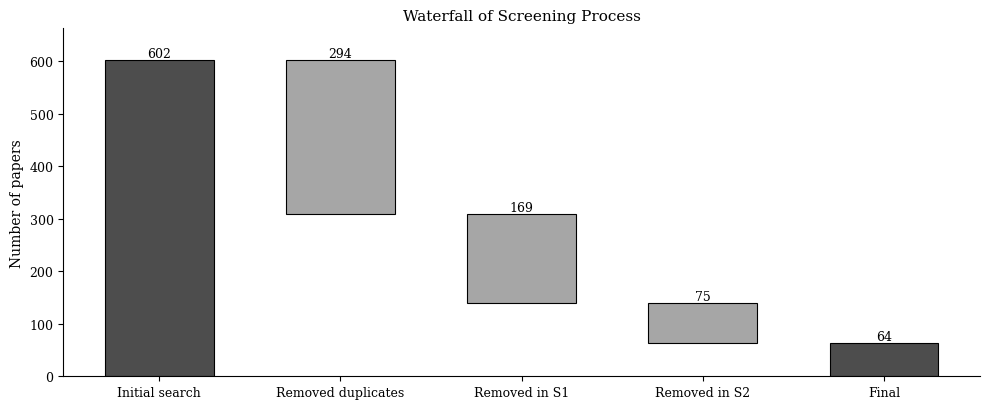

In [1026]:
import matplotlib.pyplot as plt
import numpy as np

# --- counts from your data ---
n_initial_search = len(initial_search_df)
n_duplicates = n_initial_search - len(removed_duplicates_df)
n_removed_s1 = len(removed_duplicates_df) - len(after_s1_df)
n_removed_s2 = 75
n_final = len(after_s1_df) - n_removed_s2

# --- waterfall data ---
labels  = ["Initial search", "Removed duplicates", "Removed in S1", "Removed in S2", "Final"]
values  = [n_initial_search, n_duplicates, n_removed_s1, n_removed_s2, n_final]

# beregn nivået etter hvert steg (alt trekkes fra)
levels = [n_initial_search]
for v in values[1:]:
    levels.append(levels[-1] - v)

# --- stil for akademisk presentasjon ---
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 10,
    "axes.titlesize": 11,
    "axes.labelsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
})

# --- plot ---
fig, ax = plt.subplots(figsize=(10, 4.2))
x = np.arange(len(labels))

# gråtoner i stedet for rødt
colors = [
    "#4d4d4d",  # initial
    "#a6a6a6",  # removed duplicates
    "#a6a6a6",  # removed in S1
    "#a6a6a6",  # removed in S2
    "#4d4d4d"   # final
]

# stolper
for i in range(len(labels)):
    if i == 0:
        ax.bar(x[i], values[i], color=colors[i], width=0.6, edgecolor="black", linewidth=0.8)
    else:
        ax.bar(x[i], values[i], bottom=levels[i-1]-values[i], color=colors[i], width=0.6, edgecolor="black", linewidth=0.8)
    # tekst
    ax.text(x[i], levels[i-1] if i > 0 else values[i],
            f"{int(values[i]):,}",
            ha="center", va="bottom", fontsize=9)

# --- akseoppsett ---
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Number of papers")
ax.set_title("Waterfall of Screening Process")
ax.set_ylim(0, n_initial_search * 1.1)
ax.grid(False)

# fjern topp og høyre ramme
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# stram layout
plt.tight_layout()
plt.show()

### 2.2 Articles per Database Chart

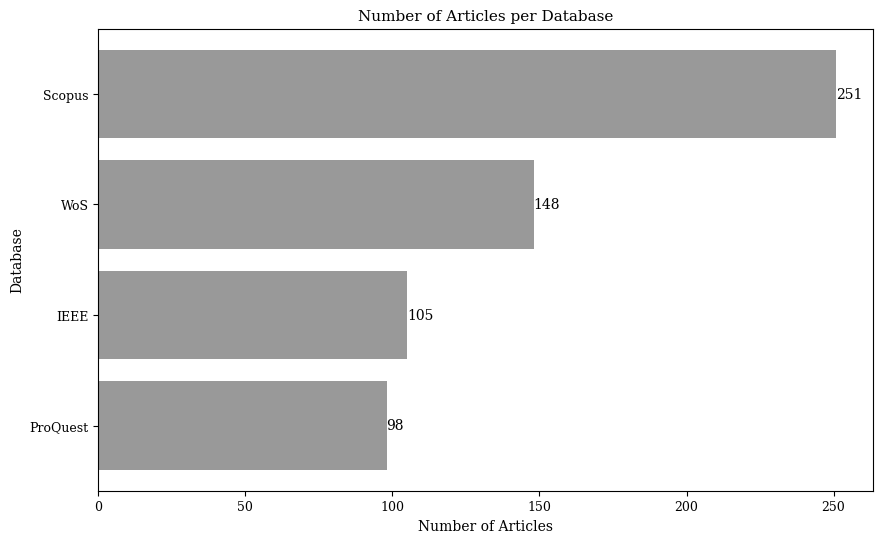

In [1027]:
# Bar chart of total sample size of articles per database before cleaning and screening

import matplotlib.pyplot as plt

wos_results_before_screening = len(clean_wos_df)
scopus_results_before_screening = len(clean_scopus_df)
ieee_results_before_screening = len(clean_ieee_df)
proquest_results_before_screening = len(clean_proquest_df)

# Data for the chart
databases = ['ProQuest', 'IEEE', 'WoS', 'Scopus']
results = [proquest_results_before_screening, ieee_results_before_screening, wos_results_before_screening, scopus_results_before_screening]
colors = ['#999999', '#999999', '#999999', '#999999']

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(databases, results, color=colors)

# Add numbers on top of the bars
for bar in bars:
  width = bar.get_width()
  plt.text(width, bar.get_y() + bar.get_height()/2, str(int(width)), ha='left', va='center')

# Add labels and title
plt.xlabel('Number of Articles')
plt.ylabel('Database')
plt.title('Number of Articles per Database')

# Show the chart
plt.show()

### 2.3 Publication Trends by Year Chart

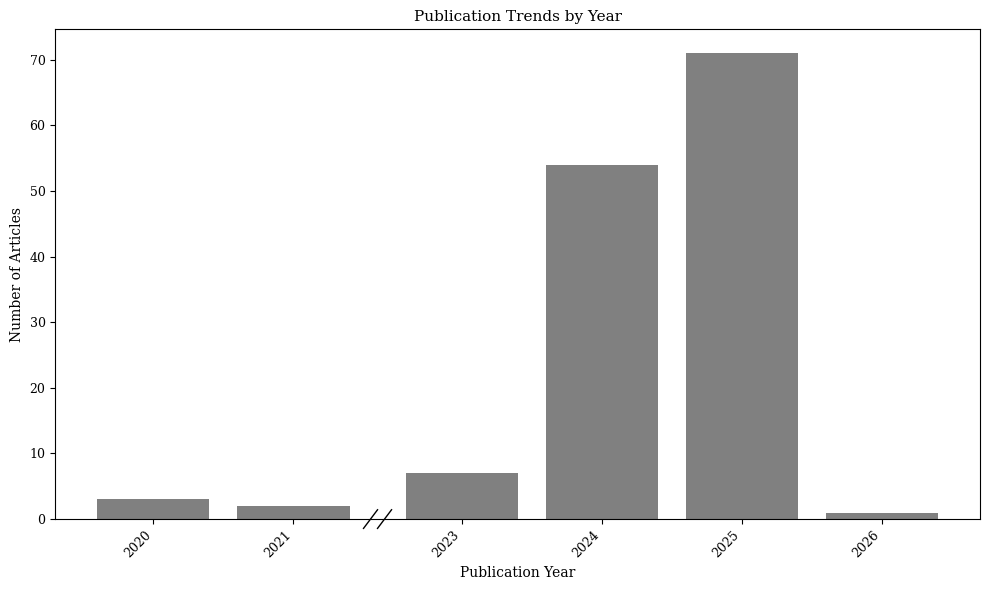

In [1028]:
# Get the publication year counts
publication_years = merged_df['Publication Year'].value_counts().sort_index()

# Get the list of years with publications and their counts
years_with_publications = publication_years.index.tolist()
counts = publication_years.values.tolist()

# Initialize lists for positions and labels
positions = []
x_labels = []
current_position = 0
gap_positions = []

# Loop through the years to handle missing years
gap_size = 0.1
for i, year in enumerate(years_with_publications):
    if i > 0:
        gap = year - years_with_publications[i - 1]
        if gap > 1:
            # Insert a small gap for gaps greater than 1 year
            current_position += gap_size
            gap_positions.append(current_position)  # Record the gap position
            current_position += gap_size

    # Add the current year
    positions.append(current_position)
    x_labels.append(str(int(year)))
    current_position += 1  # Increment position for the next bar

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(positions, counts, color='gray', width=0.8)

# Set the x-ticks to match the positions and labels
ax.set_xticks(positions)
ax.set_xticklabels(x_labels, rotation=45, ha='right')

# Draw '//' at the gap positions
for gap_pos in gap_positions:
    # Coordinates for the '//' symbol
    y = -max(counts) * 0.02  # Slightly below the x-axis
    dy = max(counts) * 0.04  # Length of the slashes

    # Draw two slashes to represent the '//' symbol
    ax.plot([gap_pos - 0.5 - gap_size, gap_pos - 0.5], [y, y + dy], color='black', clip_on=False, linewidth=1)
    ax.plot([gap_pos - 0.5, gap_pos - 0.5 + gap_size], [y, y + dy], color='black', clip_on=False, linewidth=1)

# Add labels and title
ax.set_xlabel('Publication Year')
ax.set_ylabel('Number of Articles')
ax.set_title('Publication Trends by Year')

# Force y axis to start at 0
ax.set_ylim(bottom=0)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()
plt.show()

### 2.4 Functional Roles of LLM Distribution Chart

[nan '✔️' '❌' '?']


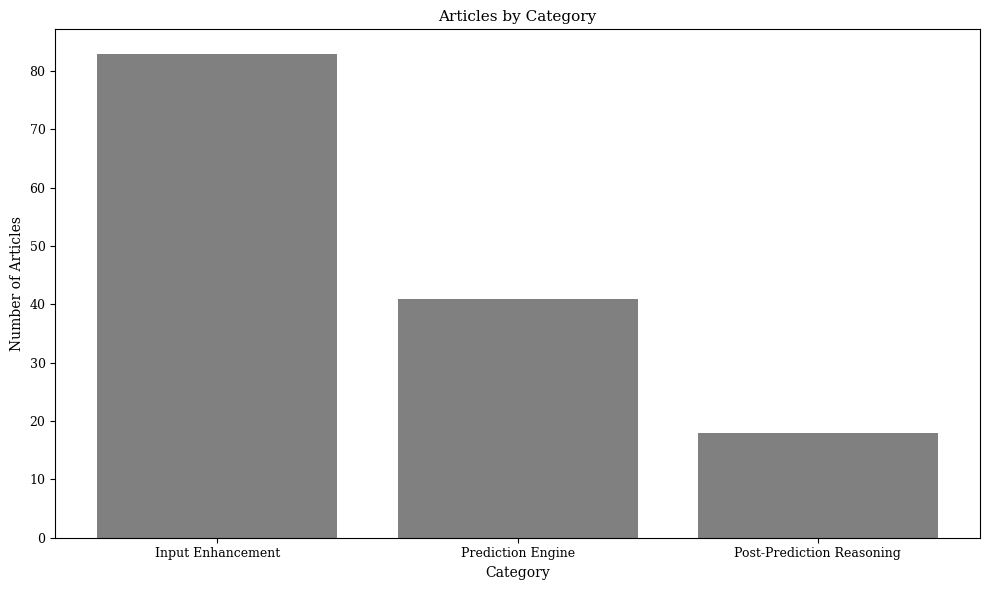

In [1029]:
import matplotlib.pyplot as plt

# Kolonnenavn fra Notion / df
cols = ["Input enhancement?", "Prediction engine?", "Post-prediction reasoning?"]
labels = ["Input Enhancement", "Prediction Engine", "Post-Prediction Reasoning"]

# Tell antall artikler med ✔️ i hver kolonne
counts = [(notion_df[c] == "✔️").sum() for c in cols]
print(notion_df["Input enhancement?"].unique())

# Lag søylediagram (samme stil og farger som originalgrafen)
fig, ax = plt.subplots(figsize=(10, 6))
positions = list(range(len(labels)))

ax.bar(positions, counts, color='gray', width=0.8)

# Akser og titler
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=0, ha='center')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Articles')
ax.set_title('Articles by Category')

# Start y-aksen på 0
ax.set_ylim(bottom=0)

# Stram layout og vis
plt.tight_layout()
plt.show()


### 2.5 Sentiment Type Distribution Chart